In [1]:
import numpy as np
import pandas as pd #导入全部
from pandas import Series,DataFrame #只导入单个

# 增加和删除

## 序列的增加和删除

In [2]:
s=Series([3,4,5,6],index=['a','b','c','d']) #指定索引
s

a    3
b    4
c    5
d    6
dtype: int64

In [5]:
s['a']=5 #原索引在，执行修改，和字典类似
s

a    5
b    4
c    5
d    6
dtype: int64

In [7]:
s['e']=0 #增加操作
s

a    5
b    4
c    5
d    6
e    0
dtype: int64

In [9]:
s.drop('a')  #删除一个

b    4
c    5
d    6
e    0
dtype: int64

In [10]:
s.drop(['a','c'])#删除多个，新生成

b    4
d    6
e    0
dtype: int64

In [14]:
s=Series([3,4,5,6],index=['a','b','c','d']) #指定索引
s

a    3
b    4
c    5
d    6
dtype: int64

In [15]:
s.drop(['a','c'],inplace=True)#删除多个,原地删除

In [17]:
s

b    4
d    6
dtype: int64

In [18]:
s.pop('b')  #弹出，删除

4

In [19]:
s

d    6
dtype: int64

In [20]:
s=Series([3,4,5,6],index=['a','b','c','d']) #指定索引
s

a    3
b    4
c    5
d    6
dtype: int64

## dataframe的增加和删除

In [30]:
data1=[[1, 2, 3],[4, 5, 6],[7, 8, 9]] #二维列表创建,二维元组
d1=DataFrame(data1,index=['a','b','c'],columns=['one','two','three'])
d1

,one,two,three
a,1,2,3
b,4,5,6
c,7,8,9


In [31]:
d1.loc['d']=[7,7,9]# 增加一行，如果原来的行存在则进行修改
d1

,one,two,three
a,1,2,3
b,4,5,6
c,7,8,9
d,7,7,9


In [33]:
d1.loc['e']=9 #标量自动扩展
d1

,one,two,three
a,1,2,3
b,4,5,6
c,7,8,9
d,7,7,9
e,9,9,9


In [34]:
#增加列
data1=[[1, 2, 3],[4, 5, 6],[7, 8, 9]] #二维列表创建,二维元组
d1=DataFrame(data1,index=['a','b','c'],columns=['one','two','three'])
d1

,one,two,three
a,1,2,3
b,4,5,6
c,7,8,9


In [37]:
d1['four']=[7,8,9]#长度要一致
d1

,one,two,three,four
a,1,2,3,7
b,4,5,6,8
c,7,8,9,9


In [38]:
d1['five']=10 #标量自动扩展
d1

,one,two,three,four,five
a,1,2,3,7,10
b,4,5,6,8,10
c,7,8,9,9,10


In [39]:
d1['six']=d1['five']+d1['one']
d1

,one,two,three,four,five,six
a,1,2,3,7,10,11
b,4,5,6,8,10,14
c,7,8,9,9,10,17


In [40]:
d1['seven']=d1.sum(axis=1)
d1

,one,two,three,four,five,six,seven
a,1,2,3,7,10,11,34
b,4,5,6,8,10,14,47
c,7,8,9,9,10,17,60


In [41]:
d1.insert(0,'eight',[1,1,1]) #在默认列索引插入列,原地操作

In [52]:
data1=[[1, 2, 3],[4, 5, 6],[7, 8, 9]] #二维列表创建,二维元组
d1=DataFrame(data1,index=['a','b','c'],columns=['two','one','three'])
d1

,two,one,three
a,1,2,3
b,4,5,6
c,7,8,9


In [55]:
d2=d1.drop('one',axis=1)
d2

,two,three
a,1,3
b,4,6
c,7,9


In [56]:
d2.insert(0,'one',d1['one'])

In [57]:
d2

,one,two,three
a,2,1,3
b,5,4,6
c,8,7,9


In [58]:
d1

,two,one,three
a,1,2,3
b,4,5,6
c,7,8,9


In [61]:
#删除
d1.drop('a',axis=0)   #删除行，默认情况，axis=0

,two,one,three
b,4,5,6
c,7,8,9


In [62]:
d1.drop('two',axis=1) #删除列

,one,three
a,2,3
b,5,6
c,8,9


In [64]:
d1.drop(['one','two'],axis=1) #删除多列

,three
a,3
b,6
c,9


In [65]:
d1.drop(['a','b'],axis=0) #删除多行

,two,one,three
c,7,8,9


In [72]:
data1=[[1, 2, 3],[4, 5, 6],[7, 8, 9]] #二维列表创建,二维元组
d1=DataFrame(data1,index=['a','b','c'],columns=['two','one','three'])
d1

,two,one,three
a,1,2,3
b,4,5,6
c,7,8,9


In [74]:
d1.insert(0,'one',d1.pop('one'))  #把某列插到前面

# 缺失值的处理

## 缺失值的判断

In [89]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [91]:
s=Series(['a',4,5,None,np.nan])
s

0       a
1       4
2       5
3    None
4     NaN
dtype: object

In [3]:
s.isnull() #缺失值的判断

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [92]:
s.notnull() 

0     True
1     True
2     True
3    False
4    False
dtype: bool

In [94]:
s[s.notnull()]  #选择非空的

0    a
1    4
2    5
dtype: object

In [95]:
data1=[[1, 2, None],[4, 5, np.nan],[7, 8, 9]] #二维列表创建,二维元组
d1=DataFrame(data1)
d1

,0,1,2
0,1,2,NaN
1,4,5,NaN
2,7,8,9.0


In [96]:
d1.isnull() 

,0,1,2
0,False,False,True
1,False,False,True
2,False,False,False


In [97]:
d1.notnull() 

,0,1,2
0,True,True,False
1,True,True,False
2,True,True,True


## 缺失值的删除

In [99]:
s=Series(['a',4,5,None,np.nan])
s

0       a
1       4
2       5
3    None
4     NaN
dtype: object

In [6]:
s[s.notnull()]#过滤，把非缺失的选出  方法1

0    a
1    4
2    5
dtype: object

In [104]:
s.dropna()     #删除缺失值    方法2，更常用，默认新生成

0    a
1    4
2    5
dtype: object

In [102]:
s.dropna(inplace=True)   #原地删除  

In [103]:
s

0    a
1    4
2    5
dtype: object

In [105]:
df = pd.DataFrame(np.random.rand(4, 5))
df.index = ['a', 'b', 'c', 'd']
df.columns = ['value1','value2','value3','value4','value5']
df.iloc[0:3,1]=np.nan
df  #先产生有缺失值的数据

,value1,value2,value3,value4,value5
a,0.692484,NaN,0.911262,0.640323,0.899488
b,0.787119,NaN,0.950467,0.460623,0.100814
c,0.506909,NaN,0.097832,0.367617,0.448863
d,0.397779,0.214089,0.826829,0.483875,0.552850


In [106]:
df.dropna(axis=0) #沿着0轴方向看，是否有缺失，删除的是行

,value1,value2,value3,value4,value5
d,0.397779,0.214089,0.826829,0.483875,0.55285


In [107]:
df.dropna(axis=1) #沿着1轴方向看，是否有缺失，删除的是列

,value1,value3,value4,value5
a,0.692484,0.911262,0.640323,0.899488
b,0.787119,0.950467,0.460623,0.100814
c,0.506909,0.097832,0.367617,0.448863
d,0.397779,0.826829,0.483875,0.552850


In [109]:
df

,value1,value2,value3,value4,value5
a,0.692484,NaN,0.911262,0.640323,0.899488
b,0.787119,NaN,0.950467,0.460623,0.100814
c,0.506909,NaN,0.097832,0.367617,0.448863
d,0.397779,0.214089,0.826829,0.483875,0.552850


In [110]:
df.dropna(axis=0,thresh=5)   # 删除非nan的数量小于5的行，阈值，保留非空的数量大于等于5的行

,value1,value2,value3,value4,value5
d,0.397779,0.214089,0.826829,0.483875,0.55285


In [111]:
df.dropna(axis=1,thresh=2)  #阈值，保留非空的数量大于等于2的列

,value1,value3,value4,value5
a,0.692484,0.911262,0.640323,0.899488
b,0.787119,0.950467,0.460623,0.100814
c,0.506909,0.097832,0.367617,0.448863
d,0.397779,0.826829,0.483875,0.552850


In [112]:
df

,value1,value2,value3,value4,value5
a,0.692484,NaN,0.911262,0.640323,0.899488
b,0.787119,NaN,0.950467,0.460623,0.100814
c,0.506909,NaN,0.097832,0.367617,0.448863
d,0.397779,0.214089,0.826829,0.483875,0.552850


In [113]:
df.loc['a']=np.nan
df.loc['d','value2']=np.nan
df   #随便生成一些数据

,value1,value2,value3,value4,value5
a,NaN,NaN,NaN,NaN,NaN
b,0.787119,NaN,0.950467,0.460623,0.100814
c,0.506909,NaN,0.097832,0.367617,0.448863
d,0.397779,NaN,0.826829,0.483875,0.552850


In [114]:
df.dropna(how='all',axis=0) #删除的是行，全部为nan才删除

,value1,value2,value3,value4,value5
b,0.787119,NaN,0.950467,0.460623,0.100814
c,0.506909,NaN,0.097832,0.367617,0.448863
d,0.397779,NaN,0.826829,0.483875,0.552850


In [115]:
df.dropna(how='any',axis=0) #删除的是行，只要有nan就删除

,value1,value2,value3,value4,value5


In [116]:
df.dropna(how='all',axis=1) #删除的是列，全部为nan才删除

,value1,value3,value4,value5
a,NaN,NaN,NaN,NaN
b,0.787119,0.950467,0.460623,0.100814
c,0.506909,0.097832,0.367617,0.448863
d,0.397779,0.826829,0.483875,0.552850


In [117]:
df.dropna(how='any',axis=1) #删除的是列，只要为nan就删除

""
a
b
c
d


## 重复值的删除

In [118]:
#重复值
df

,value1,value2,value3,value4,value5
a,NaN,NaN,NaN,NaN,NaN
b,0.787119,NaN,0.950467,0.460623,0.100814
c,0.506909,NaN,0.097832,0.367617,0.448863
d,0.397779,NaN,0.826829,0.483875,0.552850


In [119]:
df.loc['e']=[1,2,3,4,5]
df.loc['f']=[1,2,3,4,5]
df.loc['g']=[1,2,2,3,3]
df  #生成数据

,value1,value2,value3,value4,value5
a,NaN,NaN,NaN,NaN,NaN
b,0.787119,NaN,0.950467,0.460623,0.100814
c,0.506909,NaN,0.097832,0.367617,0.448863
d,0.397779,NaN,0.826829,0.483875,0.552850
e,1.000000,2.0,3.000000,4.000000,5.000000
f,1.000000,2.0,3.000000,4.000000,5.000000
g,1.000000,2.0,2.000000,3.000000,3.000000


In [123]:
df.duplicated().sum()

1

In [124]:
df[df.duplicated()] #把重复的选出

,value1,value2,value3,value4,value5
f,1.0,2.0,3.0,4.0,5.0


In [127]:
df.duplicated(subset='value1',keep='last')

a    False
b    False
c    False
d    False
e     True
f     True
g    False
dtype: bool

In [128]:
df

,value1,value2,value3,value4,value5
a,NaN,NaN,NaN,NaN,NaN
b,0.787119,NaN,0.950467,0.460623,0.100814
c,0.506909,NaN,0.097832,0.367617,0.448863
d,0.397779,NaN,0.826829,0.483875,0.552850
e,1.000000,2.0,3.000000,4.000000,5.000000
f,1.000000,2.0,3.000000,4.000000,5.000000
g,1.000000,2.0,2.000000,3.000000,3.000000


In [129]:
df.drop_duplicates(keep='first') #删除行，所有的列相同认为是重复

,value1,value2,value3,value4,value5
a,NaN,NaN,NaN,NaN,NaN
b,0.787119,NaN,0.950467,0.460623,0.100814
c,0.506909,NaN,0.097832,0.367617,0.448863
d,0.397779,NaN,0.826829,0.483875,0.552850
e,1.000000,2.0,3.000000,4.000000,5.000000
g,1.000000,2.0,2.000000,3.000000,3.000000


In [130]:
df.drop_duplicates(keep='last') #删除行，所有的列相同认为是重复

,value1,value2,value3,value4,value5
a,NaN,NaN,NaN,NaN,NaN
b,0.787119,NaN,0.950467,0.460623,0.100814
c,0.506909,NaN,0.097832,0.367617,0.448863
d,0.397779,NaN,0.826829,0.483875,0.552850
f,1.000000,2.0,3.000000,4.000000,5.000000
g,1.000000,2.0,2.000000,3.000000,3.000000


In [131]:
df

,value1,value2,value3,value4,value5
a,NaN,NaN,NaN,NaN,NaN
b,0.787119,NaN,0.950467,0.460623,0.100814
c,0.506909,NaN,0.097832,0.367617,0.448863
d,0.397779,NaN,0.826829,0.483875,0.552850
e,1.000000,2.0,3.000000,4.000000,5.000000
f,1.000000,2.0,3.000000,4.000000,5.000000
g,1.000000,2.0,2.000000,3.000000,3.000000


In [132]:
df.drop_duplicates(['value1','value2'],keep='first')  #value1和value2相同则去重复

,value1,value2,value3,value4,value5
a,NaN,NaN,NaN,NaN,NaN
b,0.787119,NaN,0.950467,0.460623,0.100814
c,0.506909,NaN,0.097832,0.367617,0.448863
d,0.397779,NaN,0.826829,0.483875,0.552850
e,1.000000,2.0,3.000000,4.000000,5.000000


## 数据的填充和替换

### 普通数据的替换

In [133]:
df = pd.DataFrame([
    ['小ming', 18],
    ['小强', 19],
    ['小丽', np.NaN],
    ['小花', np.NaN]
],columns=['name', 'age'], index=['a','b','c','d'])
df

,name,age
a,小ming,18.0
b,小强,19.0
c,小丽,NaN
d,小花,NaN


In [72]:
df.replace?

In [134]:
df.replace('小ming','小明')  #新生成，替换

,name,age
a,小明,18.0
b,小强,19.0
c,小丽,NaN
d,小花,NaN


In [71]:
df

,name,age
a,小ming,18.0
b,小强,19.0
c,小丽,NaN
d,小花,NaN


In [135]:
df.replace('小ming','小明',inplace=True)  #原地修改

In [136]:
df

,name,age
a,小明,18.0
b,小强,19.0
c,小丽,NaN
d,小花,NaN


In [ ]:
#股票数据，replace

In [137]:
df=pd.read_clipboard(header=None)
df

,0,1,2,3,4,5
0,0,0,联赢激光,787518,06-10,--
1,1,1,帝科股份,300842,06-09,--
2,2,2,神州细胞,787520,06-09,--
3,3,3,复旦张江,787505,06-08,--
4,4,4,聚合顺,707166,06-08,7.05
5,5,5,金宏气体,787106,06-05,15.48
6,6,6,康华生物,300841,06-04,70.37


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7 non-null      int64 
 1   1       7 non-null      int64 
 2   2       7 non-null      object
 3   3       7 non-null      int64 
 4   4       7 non-null      object
 5   5       7 non-null      object
dtypes: int64(3), object(3)
memory usage: 464.0+ bytes


In [139]:
df.replace('--',np.nan,inplace=True)  #原地修改

In [140]:
df

,0,1,2,3,4,5
0,0,0,联赢激光,787518,06-10,NaN
1,1,1,帝科股份,300842,06-09,NaN
2,2,2,神州细胞,787520,06-09,NaN
3,3,3,复旦张江,787505,06-08,NaN
4,4,4,聚合顺,707166,06-08,7.05
5,5,5,金宏气体,787106,06-05,15.48
6,6,6,康华生物,300841,06-04,70.37


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7 non-null      int64 
 1   1       7 non-null      int64 
 2   2       7 non-null      object
 3   3       7 non-null      int64 
 4   4       7 non-null      object
 5   5       3 non-null      object
dtypes: int64(3), object(3)
memory usage: 464.0+ bytes


### 缺失值的填充

In [142]:
a = [[1, 2, 2],[3,None,6],[3, 7, None],[5,None,7]]
df = DataFrame(a)
df

,0,1,2
0,1,2.0,2.0
1,3,NaN,6.0
2,3,7.0,NaN
3,5,NaN,7.0


In [143]:
df.fillna(0) #用常数进行填充

,0,1,2
0,1,2.0,2.0
1,3,0.0,6.0
2,3,7.0,0.0
3,5,0.0,7.0


In [81]:
df.fillna({1:0,2:100}) #用不同的值填充不同的列

,0,1,2
0,1,2.0,2.0
1,3,0.0,6.0
2,3,7.0,100.0
3,5,0.0,7.0


In [144]:
df

,0,1,2
0,1,2.0,2.0
1,3,NaN,6.0
2,3,7.0,NaN
3,5,NaN,7.0


In [145]:
df.fillna(method='ffill') #前向填充，同一列的前一行，默认axis=0

,0,1,2
0,1,2.0,2.0
1,3,2.0,6.0
2,3,7.0,6.0
3,5,7.0,7.0


In [90]:
df.fillna(method='bfill') #后向填充

,0,1,2
0,1,2.0,2.0
1,3,7.0,6.0
2,3,7.0,7.0
3,5,NaN,7.0


In [146]:
df

,0,1,2
0,1,2.0,2.0
1,3,NaN,6.0
2,3,7.0,NaN
3,5,NaN,7.0


In [93]:
df.fillna(method='ffill',axis=1) #后向填充

,0,1,2
0,1.0,2.0,2.0
1,3.0,3.0,6.0
2,3.0,7.0,7.0
3,5.0,5.0,7.0


In [147]:
df

,0,1,2
0,1,2.0,2.0
1,3,NaN,6.0
2,3,7.0,NaN
3,5,NaN,7.0


In [96]:
df.mean()

0    3.0
1    4.5
2    5.0
dtype: float64

In [97]:
df.fillna(df.mean()) #用均值填充，按照列进行 max，min

,0,1,2
0,1,2.0,2.0
1,3,4.5,6.0
2,3,7.0,5.0
3,5,4.5,7.0


In [91]:
df.fillna(df[0].mean())  #用某一列的均值进行填充

,0,1,2
0,1,2.0,2.0
1,3,3.0,6.0
2,3,7.0,3.0
3,5,3.0,7.0


In [ ]:
#按不同的组进行分组再填充

In [148]:
df = pd.DataFrame([
    ['1','小明', 18],
    ['2','小强', 19],
    ['2','小丽', 20],
    ['2','小花', np.NaN],
    ['1','小张', np.NaN]
],columns=['年级','name', 'age'], index=['a','b','c','d','e'])
df

,年级,name,age
a,1,小明,18.0
b,2,小强,19.0
c,2,小丽,20.0
d,2,小花,NaN
e,1,小张,NaN


In [149]:
df1=df.groupby('年级').mean()
df1

,age
年级,
1,18.0
2,19.5


In [152]:
df.groupby('年级')['age'].apply(lambda x: x.fillna(x.mean()))

a    18.0
b    19.0
c    20.0
d    19.5
e    18.0
Name: age, dtype: float64

In [161]:
a=[[2,2],[1,1]]
a.sort(key=lambda x:x[1])

In [162]:
a

[[1, 1], [2, 2]]

In [163]:
a=[1,2,3,5,4]
a.sort()
a

[1, 2, 3, 4, 5]

# 算术运算和对齐

In [165]:
#序列运算
s1=Series([4,2,-5,3],index=['d','b','a','e'])
s2=Series([4,2,-5,3,6,7],index=['d','b','a','c','f','g']) #自动对齐索引，缺失值会在运算中传播
s1+s2

a   -10.0
b     4.0
c     NaN
d     8.0
e     NaN
f     NaN
g     NaN
dtype: float64

In [110]:
s1.add(s2,fill_value=0) #调用方法,空值用0填充

a   -10.0
b     4.0
c     3.0
d     8.0
e     3.0
f     6.0
g     7.0
dtype: float64

In [166]:
#dataframe的运算
df1 = DataFrame([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]],
    index=['a','b','c'],columns=['one','two','three'])

df2 = DataFrame([
    [1, 2, 3, 5],
    [4, 5, 6, 7],
    [7, 8, 9, 9],
    [7, 8, 1, 4]],
    index=['a','b','c','d'],columns=['one','two','three','four'])
df1+df2  #直接相加

,four,one,three,two
a,NaN,2.0,6.0,4.0
b,NaN,8.0,12.0,10.0
c,NaN,14.0,18.0,16.0
d,NaN,NaN,NaN,NaN


In [112]:
df1.add(df2,fill_value=0) #调用方法,填充值

,four,one,three,two
a,5.0,2.0,6.0,4.0
b,7.0,8.0,12.0,10.0
c,9.0,14.0,18.0,16.0
d,4.0,7.0,1.0,8.0


In [167]:
df1

,one,two,three
a,1,2,3
b,4,5,6
c,7,8,9


In [169]:
#apply，map
f=lambda x:x+10
df1.apply(f)    #dataframe 只有apply

,one,two,three
a,11,12,13
b,14,15,16
c,17,18,19


In [121]:
df1['one'].apply(f)   #序列，可以map，可以apply

a    11
b    14
c    17
Name: one, dtype: int64

In [170]:
df1['one'].map(f) 

a    11
b    14
c    17
Name: one, dtype: int64

In [122]:
df1

,one,two,three
a,1,2,3
b,4,5,6
c,7,8,9


In [123]:
df1.apply(np.mean,axis=0)   #np.mean,std,sum,max  numpy系统带的一些函数

one      4.0
two      5.0
three    6.0
dtype: float64

In [14]:
df1.apply(np.mean,axis=1) #需要特别指定

a    2.0
b    5.0
c    8.0
dtype: float64

In [171]:
df1

,one,two,three
a,1,2,3
b,4,5,6
c,7,8,9


In [151]:
#自定义函数
def f(x):
    return x*x  #判断

In [172]:
df1.apply(f) 

,one,two,three
a,11,12,13
b,14,15,16
c,17,18,19


In [173]:
df1

,one,two,three
a,1,2,3
b,4,5,6
c,7,8,9


In [174]:
#扩展性很强，可以写复杂函数
def f(x):
    if x<5:
        return x
    else:
        return x*x  

In [181]:
for i in df1.columns:
    df1[i]=df1[i].map(f) #对所有的列进行操作

In [180]:
df1

,one,two,three
a,1,2,3
b,4,625,1296
c,2401,4096,6561


# 排序

## 序列的排序

In [188]:
#序列
s=pd.Series([3,4,1,6],index=['a','c','b','d'])
s

a    3
c    4
b    1
d    6
dtype: int64

In [189]:
s.sort_index() #按索引排序

a    3
b    1
c    4
d    6
dtype: int64

In [190]:
s.sort_values() #按值的大小,从小大

b    1
a    3
c    4
d    6
dtype: int64

In [191]:
s.sort_values(ascending=False,inplace=True) #ascending=False 降序,原地排

In [192]:
s

d    6
c    4
a    3
b    1
dtype: int64

## dataframe的排序

In [194]:
d1=pd.DataFrame([[2,4,1,5],[3,1,4,5],[5,1,4,2]],columns=['b','a','d','c'],index=['one','two','four'])
d1

,b,a,d,c
one,2,4,1,5
two,3,1,4,5
four,5,1,4,2


In [195]:
d1.sort_index(axis=0,ascending=True) #默认,升序

,b,a,d,c
four,5,1,4,2
one,2,4,1,5
two,3,1,4,5


In [196]:
d1.sort_index(axis=1,ascending=True) #默认

,a,b,c,d
one,4,2,5,1
two,1,3,5,4
four,1,5,2,4


In [197]:
d1

,b,a,d,c
one,2,4,1,5
two,3,1,4,5
four,5,1,4,2


In [198]:
d1.sort_values(by='a',ascending=True) #默认按照列排序

,b,a,d,c
two,3,1,4,5
four,5,1,4,2
one,2,4,1,5


In [199]:
d1

,b,a,d,c
one,2,4,1,5
two,3,1,4,5
four,5,1,4,2


In [201]:
d1.sort_values(by='two',ascending=False,axis=1) #按照行排序，需要指定轴

,c,d,b,a
one,5,1,2,4
two,5,4,3,1
four,2,4,5,1


## 排序案例

In [202]:
df=pd.read_csv('taobao_data.txt')
df.head()

,宝贝,价格,成交量,卖家,位置
0,新款中老年女装春装雪纺打底衫妈妈装夏装中袖宽松上衣中年人t恤,99.0,16647,夏奈凤凰旗舰店,江苏
1,中老年女装清凉两件套妈妈装夏装大码短袖T恤上衣雪纺衫裙裤套装,286.0,14045,夏洛特的文艺,上海
2,母亲节衣服夏季妈妈装夏装套装短袖中年人40-50岁中老年女装T恤,298.0,13458,云新旗舰店,江苏
3,母亲节衣服中老年人春装女40岁50中年妈妈装套装夏装奶奶装两件套,279.0,13340,韶妃旗舰店,浙江
4,中老年女装春夏装裤大码 中年妇女40-50岁妈妈装夏装套装七分裤,59.0,12939,千百奈旗舰店,江苏


### 按照值排序

In [203]:
df.sort_values(by='价格').head(10) #

,宝贝,价格,成交量,卖家,位置
64,中老年人女装套装妈妈装夏装大码奶奶装40-50岁60短袖T恤70两件套,29.0,4752,佳福妈妈商城,上海
28,妈妈装套装春夏装短袖上衣中年人大码40-50岁中老年女装T恤雪纺衫,49.0,6816,爱莱嘉旗舰店,江苏
88,母亲节中老年女装夏装短袖40-50岁雪纺衫大码妈妈装T恤宽上衣套装,49.0,4164,金良国际,上海
4,中老年女装春夏装裤大码 中年妇女40-50岁妈妈装夏装套装七分裤,59.0,12939,千百奈旗舰店,江苏
76,中老年女装短袖T恤套装春装打底衫T恤长袖中年妈妈装上衣宽松上衣,59.9,4421,便宜才是硬道理1234,江苏
81,中老年女装夏装假两件短袖雪纺衫40-50岁妈妈装上衣 中年女士套装,88.0,4365,江苏妈妈装厂家直销,江苏
59,中老年人女装夏装短袖t恤妈妈两件套装中年夏季上衣宽松40-50岁,96.0,4961,金星靓雅服装店,江苏
86,新母亲节妈妈夏装短袖 中老年T恤衫宽松牛奶丝上衣圆领印花短袖,98.0,4261,bobolove987,北京
79,中老年人女妈妈春夏装套装60-70-80岁奶奶装七分袖上衣裤子两件套,98.0,4382,孝义妈妈装,江苏
0,新款中老年女装春装雪纺打底衫妈妈装夏装中袖宽松上衣中年人t恤,99.0,16647,夏奈凤凰旗舰店,江苏


### 设置索引再排序

In [204]:
df1=df.set_index(['位置']) #重新设置索引
df1.sort_index(axis=0,ascending=False) #默认

,宝贝,价格,成交量,卖家
位置,,,,
湖北,母亲节上衣服夏季中年妈妈春装雪纺衫夏装短袖中老年女装大码外套,256.0,5005,乔芙丽旗舰店
湖北,妈妈装春夏装雪纺衫大码中老年女装上衣中长袖t恤中年人打底衬衫,158.0,5001,千香旗舰店
湖北,妈妈装春夏装T恤宽松雪纺衬衫40-50岁中老年女装大码中袖上衣套装,199.0,12398,千百萌旗舰店
湖北,母亲节中老年女装运动服套装中年妈妈春装外套40岁50衣服2017新款,368.0,4041,欧芮嘉旗舰店
湖北,中老年女夏装上衣短袖雪纺衬衫40-50岁大码胖妈妈装T恤母亲节衣服,178.0,4111,凯利娜格旗舰店
...,...,...,...,...
上海,母亲节衣服妈妈装夏装套装短袖中年人40-50岁中老年女装T恤两件套,128.0,4718,妃莲慕旗舰店
上海,中老年人女装套装妈妈装夏装大码奶奶装40-50岁60短袖T恤70两件套,29.0,4752,佳福妈妈商城
上海,中老年女装夏装套装加肥加大码T恤上衣妈妈装时尚短袖夏季两件套,298.0,5325,简港旗舰店


In [211]:
#多层索引
df2=df.set_index(['位置','价格']) #重新设置索引
df2.head()

,,宝贝,成交量,卖家
位置,价格,,,
江苏,99.0,新款中老年女装春装雪纺打底衫妈妈装夏装中袖宽松上衣中年人t恤,16647,夏奈凤凰旗舰店
上海,286.0,中老年女装清凉两件套妈妈装夏装大码短袖T恤上衣雪纺衫裙裤套装,14045,夏洛特的文艺
江苏,298.0,母亲节衣服夏季妈妈装夏装套装短袖中年人40-50岁中老年女装T恤,13458,云新旗舰店
浙江,279.0,母亲节衣服中老年人春装女40岁50中年妈妈装套装夏装奶奶装两件套,13340,韶妃旗舰店
江苏,59.0,中老年女装春夏装裤大码 中年妇女40-50岁妈妈装夏装套装七分裤,12939,千百奈旗舰店


In [213]:
df2.sort_index(level=0).head(20)#0为位置，1为价格

宝贝    成交量           卖家
位置 价格                                                            
上海 29.0   中老年人女装套装妈妈装夏装大码奶奶装40-50岁60短袖T恤70两件套   4752       佳福妈妈商城
   49.0     母亲节中老年女装夏装短袖40-50岁雪纺衫大码妈妈装T恤宽上衣套装   4164         金良国际
   99.0        中老年女装夏装短袖t恤衫中年妇女母亲节衣服妈妈装雪纺套装上衣   4572    xudong158
   128.0    母亲节衣服妈妈装夏装套装短袖中年人40-50岁中老年女装T恤两件套   4718       妃莲慕旗舰店
   138.0     母亲节衣服妈妈装夏装套装40-50岁中年两件套中老年女装短袖雪纺   6037       妃莲慕旗舰店
   189.0        中老年女装夏装套装圆领上衣裤子夏季中年妈妈装短袖T恤两件套  11632        简港旗舰店
   198.0    母亲节衣服夏季中老年女装夏装套装上衣40-50岁妈妈装T恤衫两件套   7466        简港旗舰店
   198.0     中老年女装夏装连衣裙中年雪纺上衣妈妈装中长款40-50岁大码裙子   5304       婆家娘家商城
   286.0       中老年女装清凉两件套妈妈装夏装大码短袖T恤上衣雪纺衫裙裤套装  14045       夏洛特的文艺
   298.0       中老年女装夏装套装加肥加大码T恤上衣妈妈装时尚短袖夏季两件套   5325        简港旗舰店
北京 98.0        新母亲节妈妈夏装短袖 中老年T恤衫宽松牛奶丝上衣圆领印花短袖   4261  bobolove987
   100.0      女装中年连衣裙夏季妈妈装35-50岁中老年连衣裙中长款碎花裙子   4271   taylor3699
   108.0       母亲节夏季中老年宽松短袖妇女胖妈妈装上衣加肥加大码碎花T恤女   4415    wonwon942
   138.0     中老年女装绵绸连衣裙40-50岁中年妈妈装短袖大码修身碎花裙子夏   4460        hi大脚丫
   168.0     新款妈妈装连衣裙中长款短袖夏装中年妇女40-50大码气质打底裙子   5209     凯飞服饰1717
   288.0       新款中老年女装夏季长袖妈妈装衬衫女T恤大码纯色夏装修身春装薄   4500   妈妈装工厂店1988
广东 326.0     妈妈装春装大码女装雪纺连衣裙开衫女2017夏装新款中老年两件套装   5164        安静式风格
江苏 49.0     妈妈装套装春夏装短袖上衣中年人大码40-50岁中老年女装T恤雪纺衫   6816       爱莱嘉旗舰店
   59.0      中老年女装春夏装裤大码 中年妇女40-50岁妈妈装夏装套装七分裤  12939       千百奈旗舰店
   59.9       中老年女装短袖T恤套装春装打底衫T恤长袖中年妈妈装上衣宽松上衣   4421  便宜才是硬道理1234

In [171]:
df1.reset_index().head() #恢复默认索引

,位置,价格,宝贝,成交量,卖家
0,江苏,99.0,新款中老年女装春装雪纺打底衫妈妈装夏装中袖宽松上衣中年人t恤,16647,夏奈凤凰旗舰店
1,上海,286.0,中老年女装清凉两件套妈妈装夏装大码短袖T恤上衣雪纺衫裙裤套装,14045,夏洛特的文艺
2,江苏,298.0,母亲节衣服夏季妈妈装夏装套装短袖中年人40-50岁中老年女装T恤,13458,云新旗舰店
3,浙江,279.0,母亲节衣服中老年人春装女40岁50中年妈妈装套装夏装奶奶装两件套,13340,韶妃旗舰店
4,江苏,59.0,中老年女装春夏装裤大码 中年妇女40-50岁妈妈装夏装套装七分裤,12939,千百奈旗舰店


### 多重排序

In [208]:
#多重排序
df=pd.read_csv('taobao_data.txt')
df.head()

,宝贝,价格,成交量,卖家,位置
0,新款中老年女装春装雪纺打底衫妈妈装夏装中袖宽松上衣中年人t恤,99.0,16647,夏奈凤凰旗舰店,江苏
1,中老年女装清凉两件套妈妈装夏装大码短袖T恤上衣雪纺衫裙裤套装,286.0,14045,夏洛特的文艺,上海
2,母亲节衣服夏季妈妈装夏装套装短袖中年人40-50岁中老年女装T恤,298.0,13458,云新旗舰店,江苏
3,母亲节衣服中老年人春装女40岁50中年妈妈装套装夏装奶奶装两件套,279.0,13340,韶妃旗舰店,浙江
4,中老年女装春夏装裤大码 中年妇女40-50岁妈妈装夏装套装七分裤,59.0,12939,千百奈旗舰店,江苏


In [210]:
df.sort_values(['位置','价格'],ascending=[True,False]).set_index(['位置','价格'])

宝贝    成交量               卖家
位置 价格                                                              
上海 298.0     中老年女装夏装套装加肥加大码T恤上衣妈妈装时尚短袖夏季两件套   5325            简港旗舰店
   286.0     中老年女装清凉两件套妈妈装夏装大码短袖T恤上衣雪纺衫裙裤套装  14045           夏洛特的文艺
   198.0  母亲节衣服夏季中老年女装夏装套装上衣40-50岁妈妈装T恤衫两件套   7466            简港旗舰店
   198.0   中老年女装夏装连衣裙中年雪纺上衣妈妈装中长款40-50岁大码裙子   5304           婆家娘家商城
   189.0      中老年女装夏装套装圆领上衣裤子夏季中年妈妈装短袖T恤两件套  11632            简港旗舰店
...                                     ...    ...              ...
湖北 306.0   母亲节衣服妈妈夏装雪纺连衣裙40岁50中年短袖中老年女装夏季裙子   4138  sonmellny尚曼妮旗舰店
   256.0     母亲节上衣服夏季中年妈妈春装雪纺衫夏装短袖中老年女装大码外套   5005           乔芙丽旗舰店
   199.0  妈妈装春夏装T恤宽松雪纺衬衫40-50岁中老年女装大码中袖上衣套装  12398           千百萌旗舰店
   178.0  中老年女夏装上衣短袖雪纺衬衫40-50岁大码胖妈妈装T恤母亲节衣服   4111          凯利娜格旗舰店
   158.0     妈妈装春夏装雪纺衫大码中老年女装上衣中长袖t恤中年人打底衬衫   5001            千香旗舰店

[100 rows x 3 columns]

# 统计和描述

In [214]:
a = [[1,np.nan,9],[2,8,3],[3,5,np.nan]]
data = DataFrame(a,index=["a","b","c"],columns=["one","two","three"])
data

,one,two,three
a,1,NaN,9.0
b,2,8.0,3.0
c,3,5.0,NaN


In [173]:
data.sum()   #mean.max.min var std

one       6.0
two      13.0
three    12.0
dtype: float64

In [204]:
data.mean() 

one      2.0
two      6.5
three    6.0
dtype: float64

In [205]:
data.sum(axis=1)

a    10.0
b    13.0
c     8.0
dtype: float64

In [215]:
data

,one,two,three
a,1,NaN,9.0
b,2,8.0,3.0
c,3,5.0,NaN


In [216]:
data.idxmax() #每一列中最大值的行索引

one      c
two      b
three    a
dtype: object

In [179]:
data.idxmax(axis=1) #每一行中最大值的列索引

a    three
b      two
c      two
dtype: object

In [209]:
data

,one,two,three
a,1,NaN,9.0
b,2,8.0,3.0
c,3,5.0,NaN


In [211]:
data.count()  #非空的数量

one      3
two      2
three    2
dtype: int64

In [212]:
data.describe() #描述

,one,two,three
count,3.0,2.00000,2.000000
mean,2.0,6.50000,6.000000
std,1.0,2.12132,4.242641
min,1.0,5.00000,3.000000
25%,1.5,5.75000,4.500000
50%,2.0,6.50000,6.000000
75%,2.5,7.25000,7.500000
max,3.0,8.00000,9.000000


# 数据的合并和重塑

## 拼接

In [217]:
df1 = DataFrame(np.ones((2,4))*2, index=['one','two'],columns=['a','b','c','d'])
df2 = DataFrame(np.ones((3,3))*1, index=['one','two','three'],columns=['b','d','e'])
df1

,a,b,c,d
one,2.0,2.0,2.0,2.0
two,2.0,2.0,2.0,2.0


In [218]:
df2

,b,d,e
one,1.0,1.0,1.0
two,1.0,1.0,1.0
three,1.0,1.0,1.0


### concat

In [227]:
pd.concat([df1,df2],axis=1,join='outer')  #横着拼接，外连接

,a,b,c,d,b,d,e
one,2.0,2.0,2.0,2.0,1.0,1.0,1.0
two,2.0,2.0,2.0,2.0,1.0,1.0,1.0
three,NaN,NaN,NaN,NaN,1.0,1.0,1.0


In [228]:
pd.concat([df1,df2],axis=1,join='inner')  #横着拼接，内连接

,a,b,c,d,b,d,e
one,2.0,2.0,2.0,2.0,1.0,1.0,1.0
two,2.0,2.0,2.0,2.0,1.0,1.0,1.0


In [231]:
pd.concat([df1,df2],axis=0,join='outer')  #纵向拼接，外连接

,a,b,c,d,e
one,2.0,2.0,2.0,2.0,NaN
two,2.0,2.0,2.0,2.0,NaN
one,NaN,1.0,NaN,1.0,1.0
two,NaN,1.0,NaN,1.0,1.0
three,NaN,1.0,NaN,1.0,1.0


In [233]:
pd.concat([df1,df2],axis=0,join='inner')  #内连接

,b,d
one,2.0,2.0
two,2.0,2.0
one,1.0,1.0
two,1.0,1.0
three,1.0,1.0


In [219]:
pd.concat([df1,df2],axis=0,join='inner',ignore_index=True)  #重新设置索引

,b,d
0,2.0,2.0
1,2.0,2.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


### append

In [225]:
L=[1,3,4]
L.append(5)

In [226]:
L

In [229]:
#append,只有纵向,新生成
df1=df1.append(df2,ignore_index=True)
df1

,a,b,c,d,e
0,2.0,2.0,2.0,2.0,NaN
1,2.0,2.0,2.0,2.0,NaN
2,NaN,1.0,NaN,1.0,1.0
3,NaN,1.0,NaN,1.0,1.0
4,NaN,1.0,NaN,1.0,1.0
5,NaN,1.0,NaN,1.0,1.0
6,NaN,1.0,NaN,1.0,1.0
7,NaN,1.0,NaN,1.0,1.0


## 主键合并

### 单个key

In [230]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K4'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [231]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K4,C3,D3


In [245]:
pd.merge(left,right,on='key',how='outer') #外连接

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,NaN,NaN
4,K4,NaN,NaN,C3,D3


In [246]:
pd.merge(left,right,on='key',how='inner') #内连接

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [248]:
pd.merge(left,right,on='key',how='left') #以左边为准

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,NaN,NaN


### 两个key

In [232]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [233]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [256]:
pd.merge(left,right,on=['key1','key2'],how='outer') #out方式

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [234]:
pd.merge(left,right,on=['key1','key2']) #inner

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [257]:
pd.merge(left,right,on=['key1','key2'],how='left') #以左测为准

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [258]:
pd.merge(left,right,on=['key1','key2'],how='right') #以右测为准

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


## 重塑

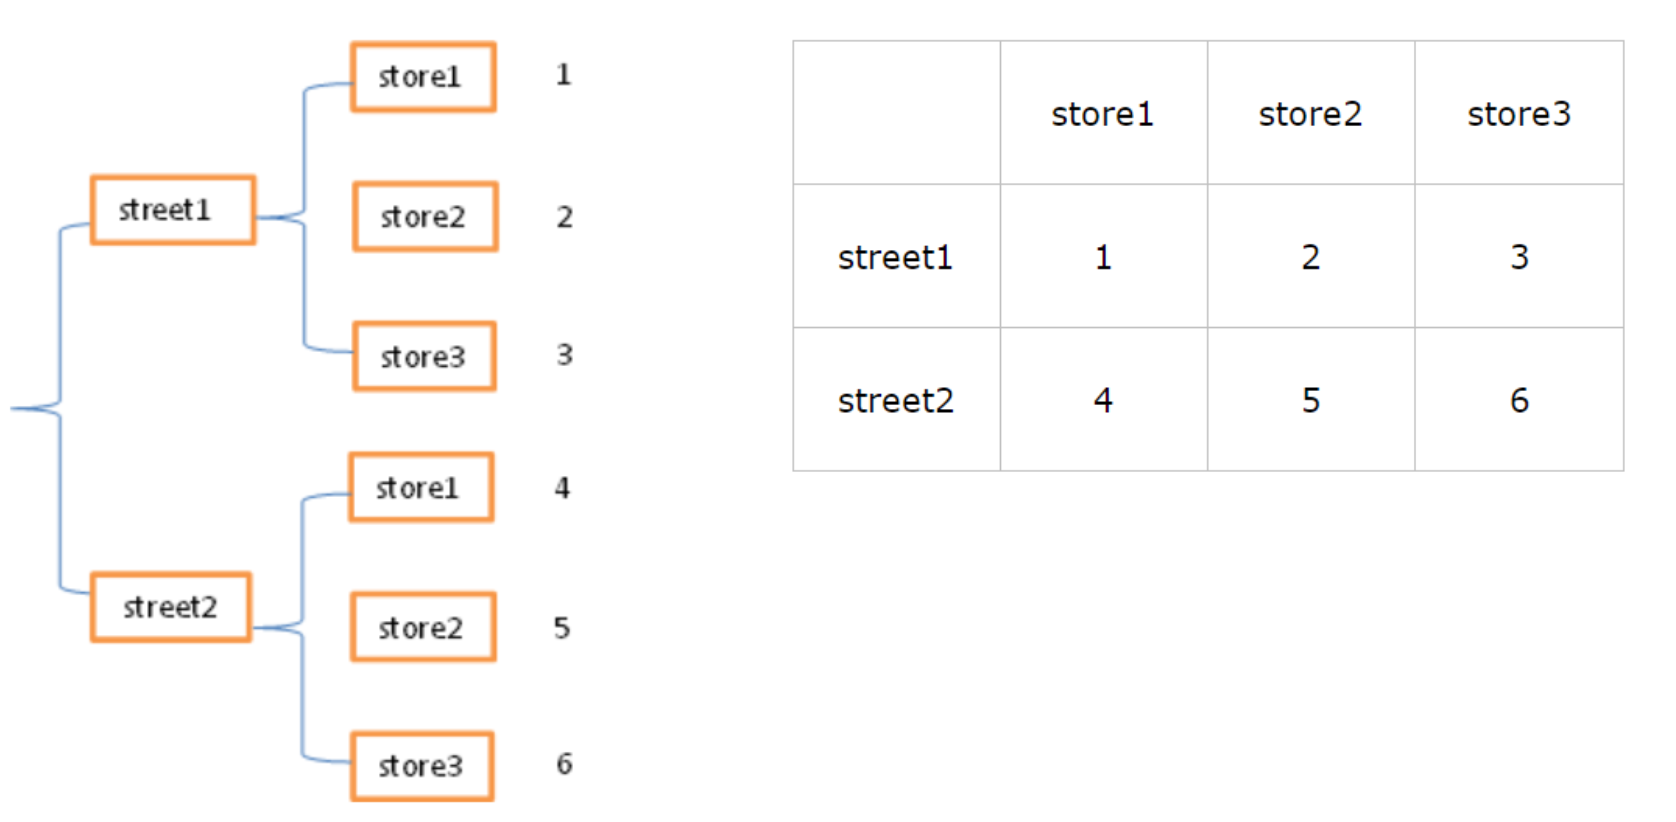

In [235]:
df = DataFrame({'水果':['苹果','梨','草莓'],
               '数量':[3,4,5],
               '价格':[4,5,6]})
df

,水果,数量,价格
0,苹果,3,4
1,梨,4,5
2,草莓,5,6


In [236]:
df.stack()

0  水果    苹果
   数量     3
   价格     4
1  水果     梨
   数量     4
   价格     5
2  水果    草莓
   数量     5
   价格     6
dtype: object

In [238]:
df = DataFrame({'ID':['101','101','102','102','103','103'],
               '物品':['小刀','笔','水','面包','笔','饼干'],
               '数量':[4,3,5,4,6,5]})
df

,ID,物品,数量
0,101,小刀,4
1,101,笔,3
2,102,水,5
3,102,面包,4
4,103,笔,6
5,103,饼干,5


In [242]:
df.set_index(['ID','物品']).unstack()

数量                    
物品    小刀    水    笔   面包   饼干
ID                          
101  4.0  NaN  3.0  NaN  NaN
102  NaN  5.0  NaN  4.0  NaN
103  NaN  NaN  6.0  NaN  5.0

In [30]:
df.pivot('ID','物品','数量')  #pivot(index=None, columns=None, values=None)

物品,小刀,水,笔,面包,饼干
ID,,,,,
101,4.0,NaN,3.0,NaN,NaN
102,NaN,5.0,NaN,4.0,NaN
103,NaN,NaN,6.0,NaN,5.0


# 分组运算

## groupby

In [243]:
df = DataFrame({'类别':['水果','水果','水果','蔬菜','蔬菜','肉类','肉类'],
                '产地':['美国','中国','中国','中国','新西兰','新西兰','美国'],
                '种类':['苹果','梨','草莓','番茄','黄瓜','羊肉','牛肉'],
               '数量':[5,5,9,3,2,10,8],
               '价格':[5,5,10,3,3,13,20]})
df

,类别,产地,种类,数量,价格
0,水果,美国,苹果,5,5
1,水果,中国,梨,5,5
2,水果,中国,草莓,9,10
3,蔬菜,中国,番茄,3,3
4,蔬菜,新西兰,黄瓜,2,3
5,肉类,新西兰,羊肉,10,13
6,肉类,美国,牛肉,8,20


In [245]:
df[['类别','价格']].groupby('类别').mean() #std,var,min,max,sum

,价格
类别,
水果,6.666667
肉类,16.500000
蔬菜,3.000000


In [246]:
df[['类别','数量']].groupby('类别').sum() #std,var,min,max,sum

,数量
类别,
水果,19
肉类,18
蔬菜,5


In [296]:
df

,类别,产地,种类,数量,价格
0,水果,美国,苹果,5,5
1,水果,中国,梨,5,5
2,水果,中国,草莓,9,10
3,蔬菜,中国,番茄,3,3
4,蔬菜,新西兰,黄瓜,2,3
5,肉类,新西兰,羊肉,10,13
6,肉类,美国,牛肉,8,20


In [247]:
df[['类别','价格','产地']].groupby(['产地','类别']).mean() #std,var,min,max,sum

价格
产地  类别      
中国  水果   7.5
    蔬菜   3.0
新西兰 肉类  13.0
    蔬菜   3.0
美国  水果   5.0
    肉类  20.0

In [248]:
df[['类别','数量','产地']].groupby(['产地','类别']).count() #统计数量

数量
产地  类别    
中国  水果   2
    蔬菜   1
新西兰 肉类   1
    蔬菜   1
美国  水果   1
    肉类   1

In [301]:
df[['类别','数量','产地']].groupby(['产地','类别']).size()

产地   类别
中国   水果    2
     蔬菜    1
新西兰  肉类    1
     蔬菜    1
美国   水果    1
     肉类    1
dtype: int64

### 淘宝数据分析

In [249]:
df = pd.read_csv('taobao_data.txt')
df.head(5)

,宝贝,价格,成交量,卖家,位置
0,新款中老年女装春装雪纺打底衫妈妈装夏装中袖宽松上衣中年人t恤,99.0,16647,夏奈凤凰旗舰店,江苏
1,中老年女装清凉两件套妈妈装夏装大码短袖T恤上衣雪纺衫裙裤套装,286.0,14045,夏洛特的文艺,上海
2,母亲节衣服夏季妈妈装夏装套装短袖中年人40-50岁中老年女装T恤,298.0,13458,云新旗舰店,江苏
3,母亲节衣服中老年人春装女40岁50中年妈妈装套装夏装奶奶装两件套,279.0,13340,韶妃旗舰店,浙江
4,中老年女装春夏装裤大码 中年妇女40-50岁妈妈装夏装套装七分裤,59.0,12939,千百奈旗舰店,江苏


#### 哪个地方的成交量最多

In [251]:
df[['位置','成交量']].groupby('位置').sum().sort_values('成交量',ascending=False)

,成交量
位置,
江苏,309360
浙江,161826
上海,68015
湖北,43274
北京,27116
河北,18152
河南,5986
广东,5164


#### 哪个卖家成交量最多

In [252]:
df[['卖家','成交量']].groupby('卖家').sum().sort_values('成交量',ascending=False).head()

,成交量
卖家,
简港旗舰店,24423
朵莹旗舰店,21957
蒲洛妃旗舰店,21683
夏奈凤凰旗舰店,16647
香颜旗舰店,14471


#### 哪个商家的成交额最多

In [254]:
df.head()

,宝贝,价格,成交量,卖家,位置
0,新款中老年女装春装雪纺打底衫妈妈装夏装中袖宽松上衣中年人t恤,99.0,16647,夏奈凤凰旗舰店,江苏
1,中老年女装清凉两件套妈妈装夏装大码短袖T恤上衣雪纺衫裙裤套装,286.0,14045,夏洛特的文艺,上海
2,母亲节衣服夏季妈妈装夏装套装短袖中年人40-50岁中老年女装T恤,298.0,13458,云新旗舰店,江苏
3,母亲节衣服中老年人春装女40岁50中年妈妈装套装夏装奶奶装两件套,279.0,13340,韶妃旗舰店,浙江
4,中老年女装春夏装裤大码 中年妇女40-50岁妈妈装夏装套装七分裤,59.0,12939,千百奈旗舰店,江苏


In [256]:
df['成交额']=df['价格']*df['成交量']
df.head()

,宝贝,价格,成交量,卖家,位置,成交额
0,新款中老年女装春装雪纺打底衫妈妈装夏装中袖宽松上衣中年人t恤,99.0,16647,夏奈凤凰旗舰店,江苏,1648053.0
1,中老年女装清凉两件套妈妈装夏装大码短袖T恤上衣雪纺衫裙裤套装,286.0,14045,夏洛特的文艺,上海,4016870.0
2,母亲节衣服夏季妈妈装夏装套装短袖中年人40-50岁中老年女装T恤,298.0,13458,云新旗舰店,江苏,4010484.0
3,母亲节衣服中老年人春装女40岁50中年妈妈装套装夏装奶奶装两件套,279.0,13340,韶妃旗舰店,浙江,3721860.0
4,中老年女装春夏装裤大码 中年妇女40-50岁妈妈装夏装套装七分裤,59.0,12939,千百奈旗舰店,江苏,763401.0


In [257]:
df[['卖家','成交额']].groupby('卖家').sum().sort_values('成交额',ascending=False).head()

,成交额
卖家,
潮流前线9170,6935336.0
朵莹旗舰店,5772296.0
简港旗舰店,5263566.0
蒲洛妃旗舰店,4934684.0
夏洛特的文艺,4016870.0


## 数据聚合

In [258]:
df=DataFrame({'key1':['a','a','b','b','a'],'key2':['one','two','one','two','one'],'data1':np.random.randn(5),'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.308604,-1.899883
1,a,two,0.765487,0.994399
2,b,one,-0.313901,-0.008729
3,b,two,-1.282004,-0.217597
4,a,one,-0.348940,0.966732


### 传入标准函数

In [282]:
df.groupby(['key1']).agg([np.mean]) #标准的函数，std，var，min,max

,data1,data2
,mean,mean
key1,,
a,-0.190050,-0.575528
b,-0.299472,0.167126


### 自定义函数

In [259]:
df

,key1,key2,data1,data2
0,a,one,-0.308604,-1.899883
1,a,two,0.765487,0.994399
2,b,one,-0.313901,-0.008729
3,b,two,-1.282004,-0.217597
4,a,one,-0.348940,0.966732


In [260]:
def ptp(arr):
    return arr.max()-arr.min()
df.groupby(['key1']).agg([ptp])

,data1,data2
,ptp,ptp
key1,,
a,1.114426,2.894283
b,0.968103,0.208868


In [273]:
df.groupby(['key1']).agg(lambda df:df.max()-df.min())

,data1,data2
key1,,
a,1.879784,2.535546
b,0.715760,0.166374


In [261]:
df.groupby(['key1']).agg([np.mean,ptp]) #可以调用多个聚合函数

data1               data2          
          mean       ptp      mean       ptp
key1                                        
a     0.035981  1.114426  0.020416  2.894283
b    -0.797953  0.968103 -0.113163  0.208868

In [ ]:
#不同的列用不同的聚合函数

In [262]:
df = DataFrame({'类别':['水果','水果','水果','蔬菜','蔬菜','肉类','肉类'],
                '产地':['美国','中国','中国','中国','新西兰','新西兰','美国'],
                '种类':['苹果','梨','草莓','番茄','黄瓜','羊肉','牛肉'],
               '数量':[5,5,9,3,2,10,8],
               '价格':[5,5,10,3,3,13,20]})
df

,类别,产地,种类,数量,价格
0,水果,美国,苹果,5,5
1,水果,中国,梨,5,5
2,水果,中国,草莓,9,10
3,蔬菜,中国,番茄,3,3
4,蔬菜,新西兰,黄瓜,2,3
5,肉类,新西兰,羊肉,10,13
6,肉类,美国,牛肉,8,20


In [263]:
#不同的列用不同的聚合函数
mapping={'数量':np.sum,'价格':np.mean} #
df.groupby('类别').agg(mapping)

,数量,价格
类别,,
水果,19,6.666667
肉类,18,16.500000
蔬菜,5,3.000000


## 透视表和交叉表

In [264]:
df = DataFrame({'类别':['水果','水果','水果','蔬菜','蔬菜','肉类','肉类'],
                '产地':['美国','中国','中国','中国','新西兰','新西兰','美国'],
                '种类':['苹果','梨','草莓','番茄','黄瓜','羊肉','牛肉'],
               '数量':[5,5,9,3,2,10,8],
               '价格':[5,5,10,3,3,13,20]})
df

,类别,产地,种类,数量,价格
0,水果,美国,苹果,5,5
1,水果,中国,梨,5,5
2,水果,中国,草莓,9,10
3,蔬菜,中国,番茄,3,3
4,蔬菜,新西兰,黄瓜,2,3
5,肉类,新西兰,羊肉,10,13
6,肉类,美国,牛肉,8,20


In [269]:
df.pivot_table(index=['类别'],values='价格') #先对类别groupby，再求mean

,价格
类别,
水果,6.666667
肉类,16.500000
蔬菜,3.000000


In [271]:
df.pivot_table(index=['类别'],values='数量',aggfunc=np.sum) 

,数量
类别,
水果,19
肉类,18
蔬菜,5


In [277]:
df.pivot_table(index=['产地','类别'],aggfunc={'数量':np.sum,'价格':np.mean})  #两层groupby

价格  数量
产地  类别          
中国  水果   7.5  14
    蔬菜   3.0   3
新西兰 肉类  13.0  10
    蔬菜   3.0   2
美国  水果   5.0   5
    肉类  20.0   8

In [ ]:
#交叉表

In [274]:
df

,类别,产地,种类,数量,价格
0,水果,美国,苹果,5,5
1,水果,中国,梨,5,5
2,水果,中国,草莓,9,10
3,蔬菜,中国,番茄,3,3
4,蔬菜,新西兰,黄瓜,2,3
5,肉类,新西兰,羊肉,10,13
6,肉类,美国,牛肉,8,20


In [275]:
pd.crosstab(df['类别'],df['产地']) #统计的是分组的频率

产地,中国,新西兰,美国
类别,,,
水果,2,0,1
肉类,0,1,1
蔬菜,1,1,0
